<a href="https://colab.research.google.com/github/Dumby-droid/Dog-Breed-Classification/blob/main/Dog_Breed_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=3bad564ac36311e5eef51e26c134a88af3def65d3cc757f2f4cb98dc3e951541
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import os
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm
import numpy as np
import tensorflow as tf
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras import layers, models

## 2. Data Understanding

In [ ]:
device_name     = tf.test.gpu_device_name()

if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir='/content/drive/MyDrive/Dog Breed Classification/Train'
test_dir='/content/drive/MyDrive/Dog Breed Classification/Test'

## 3. Data Preprocessing



In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)

In [ ]:
train_set = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle = True
)

test_set = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle = False
)

Found 76 images belonging to 13 classes.
Found 65 images belonging to 13 classes.


## 4. Modeling

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_set.num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                3341      
                                                                 
Total params: 2589261 (9.88 MB)
Trainable params: 331277

In [ ]:
model.fit(train_set,
          epochs=100,
          verbose=2,
          shuffle = False)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/100
3/3 - 43s - loss: 3.1735 - accuracy: 0.0789 - 43s/epoch - 14s/step
Epoch 2/100
3/3 - 2s - loss: 1.5797 - accuracy: 0.5132 - 2s/epoch - 739ms/step
Epoch 3/100
3/3 - 3s - loss: 0.9694 - accuracy: 0.8158 - 3s/epoch - 952ms/step
Epoch 4/100
3/3 - 2s - loss: 0.6033 - accuracy: 0.8553 - 2s/epoch - 761ms/step
Epoch 5/100
3/3 - 2s - loss: 0.3163 - accuracy: 0.9605 - 2s/epoch - 759ms/step
Epoch 6/100
3/3 - 2s - loss: 0.1976 - accuracy: 0.9605 - 2s/epoch - 731ms/step
Epoch 7/100
3/3 - 3s - loss: 0.1705 - accuracy: 0.9605 - 3s/epoch - 926ms/step
Epoch 8/100
3/3 - 3s - loss: 0.1360 - accuracy: 0.9737 - 3s/epoch - 902ms/step
Epoch 9/100
3/3 - 3s - loss: 0.0921 - accuracy: 0.9868 - 3s/epoch - 883ms/step
Epoch 10/100
3/3 - 2s - loss: 0.0692 - accuracy: 0.9868 - 2s/epoch - 728ms/step
Epoch 11/100
3/3 - 3s - loss: 0.0962 - accuracy: 0.9737 - 3s/epoch - 944ms/step
Epoch 12/100
3/3 - 3s - loss: 0.0457 - accuracy: 0.9868 - 3s/epoch - 891ms/step
Epoch 13/100
3/3 - 2s - loss: 0.0480 - accuracy: 

## 5. Evaluation

In [ ]:
class_dictionary = test_set.class_indices
print('Labels dictionary',class_dictionary)

Labels dictionary {'Beagle': 0, 'Bernese Mountain Dog': 1, 'Chihuahua': 2, 'Corgi': 3, 'Dalmatian': 4, 'Doberman': 5, 'German Shepherd': 6, 'Golden Retriver': 7, 'Pomeranian': 8, 'Poodle': 9, 'Pug': 10, 'Rottweiler': 11, 'Siberian Husky': 12}


In [ ]:
y_predicted = model.predict(test_set)

3/3 [==============================] - 22s 10s/step


In [ ]:
y_predicted

array([[9.99742329e-01, 5.03947786e-06, 1.21118701e-05, 2.06798959e-05,
        8.62116485e-06, 2.49295190e-05, 8.36351319e-05, 5.79008774e-05,
        6.89673425e-06, 2.92377645e-05, 6.45932744e-07, 5.16998853e-06,
        2.86849058e-06],
       [9.99902606e-01, 2.87839430e-06, 6.99680959e-06, 1.65101101e-05,
        5.85453381e-06, 1.99011156e-05, 6.06272306e-06, 2.35560256e-05,
        2.85336978e-06, 9.97014831e-06, 8.20987111e-07, 9.19598790e-07,
        1.05898289e-06],
       [9.99567926e-01, 5.86085207e-06, 3.09302195e-05, 1.13773509e-04,
        1.99060687e-05, 8.29733617e-05, 1.62426913e-05, 1.19926517e-04,
        9.19009199e-06, 2.59015960e-05, 2.48806759e-06, 1.74435149e-06,
        3.20768936e-06],
       [9.99338806e-01, 2.50533503e-05, 1.82707052e-04, 1.00290941e-04,
        3.05474823e-05, 1.33262874e-04, 1.15877236e-04, 1.31640445e-05,
        3.12643169e-05, 3.58880743e-06, 7.44956151e-06, 1.31075203e-05,
        4.83477470e-06],
       [9.99931812e-01, 1.28384891e-

In [ ]:
y_pred = []
for i in y_predicted:
  y_pred.append(np.argmax(i))

In [ ]:
y_pred

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 7,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12]

In [ ]:
y_test = test_set.classes.tolist()
y_test

[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12]

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print('confusion_matrix')
print(confusion_matrix)

confusion_matrix
[[5 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5]]


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print('Accuracy Score',accuracy_score(y_test,y_pred)*100,'%')
print('Precision Macro Score ',precision_score(y_test,y_pred,average = 'macro')*100,'%')
print('Recall_Score',recall_score(y_test,y_pred, average = 'macro')*100,'%')
print('F1_Score',f1_score(y_test,y_pred, average = 'macro')*100,'%')

Accuracy Score 98.46153846153847 %
Precision Macro Score  98.71794871794873 %
Recall_Score 98.46153846153847 %
F1_Score 98.44599844599846 %


## 6. LIME Explanation

In [ ]:
from tensorflow.keras.preprocessing import image

img_path='/content/drive/MyDrive/Dog Breed Classification/Test/Corgi/Corgi test2.jpg'
specific_img= image.load_img(img_path, target_size=(224, 224, 3))

In [ ]:
def predict_fn(images):
  preprocessed_images = np.array([image.img_to_array(img) for img in images]) / 255.0
  return model.predict(preprocessed_images)

In [ ]:
explainer =lime_image.LimeImageExplainer()

In [ ]:
segmenter = SegmentationAlgorithm('quickshift', kernel_size=4, max_dis=150, ratio=0.2)

In [ ]:
explanation = explainer.explain_instance(
    np.array(specific_img),
    predict_fn,
    top_labels = 5,
    hide_color = 0,
    num_samples = 100,
    segmentation_fn = segmenter
)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 43ms/step


In [ ]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

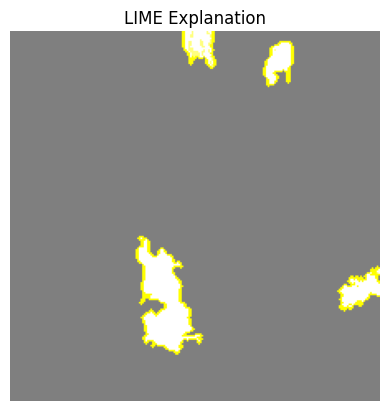

In [ ]:
temp, mask = explanation.get_image_and_mask(
    explanation.top_labels[0],
    positive_only = True,
    num_features = 5,
    hide_rest = True
)

plt.imshow(mark_boundaries(temp / 2+0.5, mask))
plt.axis('off')
plt.title('LIME Explanation')
plt.show()

## 6. Model Saving

In [ ]:
model.save('/content/drive/MyDrive/Trained Model.hdf5')

In [ ]:
saved_model=tf.keras.models.load_model('/content/drive/MyDrive/Trained Model.hdf5')

In [ ]:
saved_model.predict(test_set)